# ***Import Library***

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization,Dense,SeparableConv2D,MaxPooling2D,Activation,Flatten,Dropout

# ***Define Constants***

In [ ]:
# define the initial learning rate, batch size, and number of epochs
INIT_LR = 0.1
BATCH_SIZE = 64
NUM_EPOCHS = 5 #50
lr_find = True

classes = ['Non_Fire','Fire']

## ***Data Preprocessing***

In [ ]:
def load_dataset(dataset_folder, target_size=(224, 224)):
    images = []
    labels = []

    # Iterate through the items in the dataset folder
    for item_name in os.listdir('/content/drive/My Drive/Images/'):
        item_path = os.path.join('/content/drive/My Drive/Images/', item_name)

        # Check if the item is a directory
        if os.path.isdir(item_path):
            print("Processing images from:", item_path)
            # Iterate through the images in the class folder
            for image_name in os.listdir(item_path):
                image_path = os.path.join(item_path, image_name)
                print("Loading image:", image_path)
                # Read the image
                image = cv2.imread(image_path)
                if image is None:
                    print("Error loading image:", image_path)
                    continue
                # Resize the image to the target size
                image = cv2.resize(image, target_size)
                # Normalize pixel values to range [0, 1]
                image = image.astype('float32') / 255.0
                images.append(image)
                labels.append(item_name)  # Use folder name as label

    images = np.array(images)
    labels = np.array(labels)

    # Print the number of loaded images and labels
    print("Number of loaded images:", len(images))
    print("Number of loaded labels:", len(labels))

    return images, labels

In [ ]:
import os

# Define the path to the folder
folder_path = '/content/drive/My Drive/Images/Imagess'

# List files in the folder
files = os.listdir(folder_path)
print("Files in the folder:", files)

Files in the folder: ['9.jpg', '8.jpg', '5.jpg', '4.jpg', '6.jpg', '3.jpg', '7.jpg', '20.jpg', '2.jpg', '1.jpg', '0.jpg', '10.jpg', '54.jpg', '43.jpg', '22.jpg', '21.jpg', '19.jpg', '40.jpg', '18.jpg', '14.jpg', '15.jpg', '11.jpg', '16.jpg', '13.jpg', '12.jpg', '38.jpg', '17.jpg', '33.jpg', '42.jpg', '35.jpg', '34.jpg', '36.jpg', '37.jpg', '41.jpg', '39.jpg', '31.jpg', '126.jpg', '32.jpg', '106.jpg', '26.jpg', '28.jpg', '30.jpg', '25.jpg', '23.jpg', '24.jpg', '27.jpg', '105.jpg', '29.jpg', '98.jpg', '63.jpg', '53.jpg', '169.jpg', '55.jpg', '52.jpg', '51.jpg', '50.jpg', '47.jpg', '46.jpg', '49.jpg', '48.jpg', '174.jpg', '45.jpg', '166.jpg', '157.jpg', '44.jpg', '143.jpg', '76.jpg', '73.jpg', '68.jpg', '69.jpg', '71.jpg', '59.jpg', '57.jpg', '61.jpg', '65.jpg', '75.jpg', '64.jpg', '74.jpg', '70.jpg', '72.jpg', '67.jpg', '66.jpg', '60.jpg', '58.jpg', '62.jpg', '56.jpg', '175.jpg', '89.jpg', '88.jpg', '97.jpg', '80.jpg', '85.jpg', '83.jpg', '79.jpg', '81.jpg', '86.jpg', '95.jpg', '94.jpg',

# ***Model Architecture***

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN architecture
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification: fire or non-fire
    return model

# Get input shape from the target size
target_size = (224, 224)
input_shape = (target_size[0], target_size[1], 3)  # Assuming RGB images

# Create the model
model = create_model(input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
# Load the dataset
images, labels = load_dataset('/content/drive/My Drive/Images/Imagess')

# Print the shape of the loaded dataset
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


Processing images from: /content/drive/My Drive/Images/Imagess
Loading image: /content/drive/My Drive/Images/Imagess/9.jpg
Loading image: /content/drive/My Drive/Images/Imagess/8.jpg
Loading image: /content/drive/My Drive/Images/Imagess/5.jpg
Loading image: /content/drive/My Drive/Images/Imagess/4.jpg
Loading image: /content/drive/My Drive/Images/Imagess/6.jpg
Loading image: /content/drive/My Drive/Images/Imagess/3.jpg
Loading image: /content/drive/My Drive/Images/Imagess/7.jpg
Loading image: /content/drive/My Drive/Images/Imagess/20.jpg
Loading image: /content/drive/My Drive/Images/Imagess/2.jpg
Loading image: /content/drive/My Drive/Images/Imagess/1.jpg
Loading image: /content/drive/My Drive/Images/Imagess/0.jpg
Loading image: /content/drive/My Drive/Images/Imagess/10.jpg
Loading image: /content/drive/My Drive/Images/Imagess/54.jpg
Loading image: /content/drive/My Drive/Images/Imagess/43.jpg
Loading image: /content/drive/My Drive/Images/Imagess/22.jpg
Loading image: /content/drive/My

# ***Training*** & ***Evaluation***

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Convert labels to numerical format (one-hot encoding)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to numerical format (one-hot encoding)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/5
5/5 [==============================] - 29s 5s/step - loss: 0.1499 - accuracy: 0.8000 - val_loss: 2.5022e-19 - val_accuracy: 1.0000
Epoch 2/5
5/5 [==============================] - 22s 4s/step - loss: 4.1204e-15 - accuracy: 1.0000 - val_loss: 8.8935e-35 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 21s 4s/step - loss: 3.5908e-26 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 26s 5s/step - loss: 3.2511e-36 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 1s 206ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0
Test Accuracy: 1.0


# ***Prediction***

In [ ]:
# Make predictions on the testing data
predictions = model.predict(X_test)

# Iterate through the testing images, their corresponding labels, and predictions
for i in range(len(X_test)):
    # Get the predicted label (0 for Non-Fire, 1 for Fire)
    prediction = np.argmax(predictions[i])

    # If the model predicts Fire (class index 1), print "Fire" on the image
    if prediction == 1:
        # Create a copy of the image to avoid modifying the original
        img_with_text = X_test[i].copy()

        # Overlay "Fire" text on the image
        cv2.putText(img_with_text, "Fire", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Display the image
        cv2.imshow("Image with Fire", img_with_text)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

2/2 [==============================] - 4s 713ms/step


***Adding Text to Images & Save Modified Images***

In [ ]:
import os

# Create a directory to save the modified images
output_dir = "/content/drive/My Drive/Images_with_Text/"
os.makedirs(output_dir, exist_ok=True)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Iterate through the testing images, their corresponding labels, and predictions
for i in range(len(X_test)):
    # Get the predicted label (0 for Non-Fire, 1 for Fire)
    prediction = np.argmax(predictions[i])

    # If the model predicts Fire (class index 1), print "Fire" on the image
    if prediction == 1:
        # Create a copy of the image to avoid modifying the original
        img_with_text = X_test[i].copy()

        # Overlay "Fire" text on the image
        cv2.putText(img_with_text, "Fire", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Save the modified image to the output directory
        image_name = f"image_{i}_fire.jpg"
        image_path = os.path.join(output_dir, image_name)
        cv2.imwrite(image_path, img_with_text)

print("Modified images saved to:", output_dir)

2/2 [==============================] - 3s 467ms/step
Modified images saved to: /content/drive/My Drive/Images_with_Text/


In [ ]:
# Define the path to save the model
model_path = "/content/drive/My Drive/fire_detection_model"

# Save the trained model in native Keras format
model.save(model_path)

print("Trained model saved to:", model_path)

Trained model saved to: /content/drive/My Drive/fire_detection_model


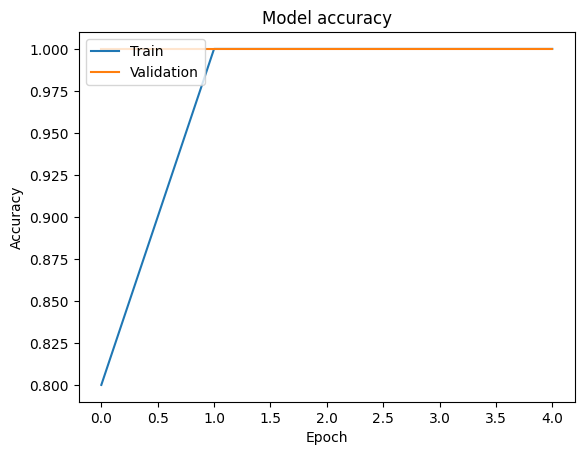

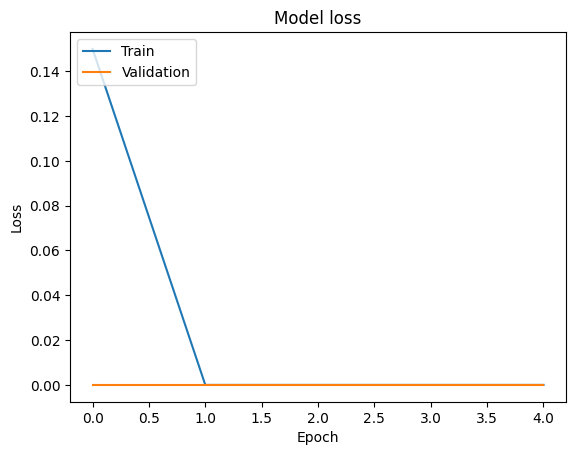

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert predicted probabilities to binary labels (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

# Convert one-hot encoded labels to binary labels (0 or 1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Calculate precision
precision = precision_score(y_test_classes, y_pred_classes)

# Calculate recall
recall = recall_score(y_test_classes, y_pred_classes)

# Calculate F1-score
f1 = f1_score(y_test_classes, y_pred_classes)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Image loaded successfully.


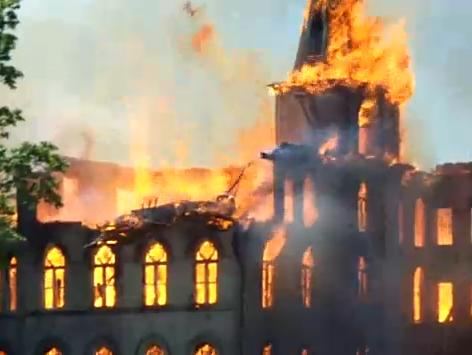

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Define the path to the image file
image_path = "/content/drive/My Drive/Images/Imagess/1.jpg"

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Failed to load image:", image_path)
else:
    print("Image loaded successfully.")

# Display the image
cv2_imshow(image)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2/2 [==============================] - 2s 381ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0
Test Accuracy: 1.0


In [ ]:
# Predict fire or smoke in new images
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)


2/2 [==============================] - 2s 316ms/step


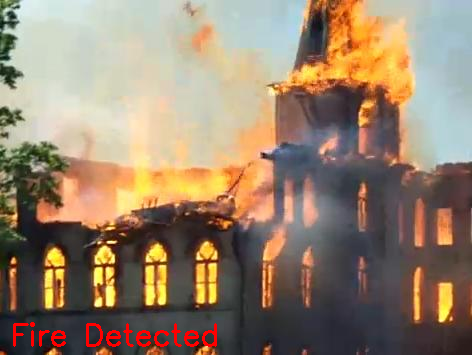

In [ ]:
def add_text_to_image(image, text):
    # Define the font scale and font thickness
    font_scale = 1
    font_thickness = 2

    # Define the font
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Get the size of the text
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]

    # Calculate the position to place the text (bottom-left corner)
    text_x = 10
    text_y = image.shape[0] - 10

    # Draw the text on the image
    cv2.putText(image, text, (text_x, text_y), font, font_scale, (0, 0, 255), font_thickness)

    return image

# Example usage:
# Assuming 'image' is the image where fire or smoke is detected
image_with_text = add_text_to_image(image, "Fire Detected")

# Display the image with text
cv2_imshow(image_with_text)


In [ ]:
# Save modified images with added text
cv2.imwrite("/content/drive/My Drive/Images/image_with_text.jpg", image_with_text)

True

In [ ]:
# Define the path to the folder containing images
folder_path = "/content/drive/My Drive/Images/Imagess/"

# Get a list of all image file names in the folder
image_files = os.listdir(folder_path)

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Failed to load image:", image_path)
        continue

    # Detect fire/smoke in the image
    image_with_detection = detect_fire_smoke(image)

    # Display the image with fire/smoke detection result
    cv2_imshow(image_with_detection)

    # Add text to the image if fire/smoke is detected
    image_with_text = add_text_to_image(image_with_detection, "Fire Detected")

    # Display the image with added text
    cv2_imshow(image_with_text)

    # Save the modified image with added text
    output_image_path = os.path.join("/content/drive/My Drive/Images/", "fire_detected_" + image_file)
    cv2.imwrite(output_image_path, image_with_text)

Output hidden; open in https://colab.research.google.com to view.

# ***Summary :***

*   **Objective** : The objective of this project is to develop a system that can detect the presence of fire or smoke in images.

*   **Approach** : The project uses a Convolutional Neural Network (CNN) to classify images as either containing fire/smoke or not. The CNN is trained on a dataset containing labeled images of fire/smoke and non-fire/non-smoke images. Once trained, the model can be used to predict whether new images contain fire/smoke.




# ***Implementation :***

*   **Data Collection** : Gathering a dataset of images containing fire/smoke and non-fire/non-smoke images.

*   **Data Preprocessing** : Preprocessing the images, including resizing, normalization, and augmentation.

*   **Model Training** : Training a CNN model on the preprocessed image data.

*   **Model Evaluation** : Evaluating the trained model's performance on a test set to assess its accuracy and other metrics.

*  **Deployment** : Deploying the trained model to detect fire/smoke in new images.





**Detection** : Once deployed, the system can analyze new images and determine whether they contain fire/smoke. If fire/smoke is detected, the system adds a text overlay indicating "Fire Detected" to the image.

# ***Conclusion :***

*   This project demonstrates the application of deep learning techniques, specifically CNNs, for image classification tasks such as fire/smoke detection.

*   The system can be useful for various applications, including fire monitoring in surveillance systems, early fire detection in forests, and fire prevention in industrial settings.

*  While the current implementation focuses on image classification, future improvements could include real-time detection in video streams, integration with fire alarm systems, and enhancing the model's accuracy and robustness through more extensive training data and advanced neural network architectures.



# ***Future Directions : ***

*   **Real-time Detection** : Extend the system to perform real-time fire/smoke detection in video streams, enabling continuous monitoring and faster response to fire incidents.

*   **Multimodal Detection** : Incorporate other sensor data such as temperature, humidity, and air quality for more comprehensive fire detection systems.

*  **Enhanced Accuracy** : Explore advanced deep learning techniques, such as transfer learning, ensembling, and neural architecture search, to improve the model's accuracy and generalization ability.

*  **Deployment** : Deploy the system in real-world scenarios, such as smart cities, industrial plants, and wildfire-prone areas, to assist in fire prevention and management efforts. Additionally, develop user-friendly interfaces for easy adoption by stakeholders and end-users.




Overall, this project lays the foundation for building intelligent fire detection systems using deep learning, with the potential to contribute significantly to public safety and environmental conservation efforts.